In [8]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv("car_sales_dataset.csv")

In [10]:
df.head

<bound method NDFrame.head of      CarID    Brand  ModelYear   Mileage  EngineSize      Price  Rating
0    C2000  Hyundai     2021.0       NaN         1.2  1466188.0     4.0
1    C2001      BMW     2023.0   45100.0         1.5  3321928.0     5.0
2    C2002   Toyota     2020.0  172445.0         1.5        NaN     3.0
3    C2003  Hyundai     2016.0   45100.0         1.5        NaN     4.0
4    C2004  Hyundai     2022.0  141975.0         NaN  1392304.0     NaN
..     ...      ...        ...       ...         ...        ...     ...
645  C2645  Hyundai     2006.0  148088.0         2.0   476283.0     1.0
646  C2646      Kia     2017.0   75796.0         1.0  3256808.0     2.0
647  C2647     Audi     2017.0   93887.0         1.0  2139816.0     NaN
648  C2648      BMW     2010.0   52695.0         1.0   958768.0     3.0
649  C2649     Audi     2019.0   52695.0         NaN  1392304.0     NaN

[650 rows x 7 columns]>

In [11]:
df.head()

,CarID,Brand,ModelYear,Mileage,EngineSize,Price,Rating
0,C2000,Hyundai,2021.0,NaN,1.2,1466188.0,4.0
1,C2001,BMW,2023.0,45100.0,1.5,3321928.0,5.0
2,C2002,Toyota,2020.0,172445.0,1.5,NaN,3.0
3,C2003,Hyundai,2016.0,45100.0,1.5,NaN,4.0
4,C2004,Hyundai,2022.0,141975.0,NaN,1392304.0,NaN


In [12]:
df.describe()

,ModelYear,Mileage,EngineSize,Price,Rating
count,617.000000,630.000000,546.000000,6.380000e+02,532.000000
mean,2014.327391,109911.165079,1.637729,2.069742e+06,3.069549
std,5.493483,50382.027325,0.538402,8.922488e+05,1.402464
min,2005.000000,13378.000000,1.000000,4.762830e+05,1.000000
25%,2009.000000,75796.000000,1.200000,1.392304e+06,2.000000
50%,2015.000000,111151.000000,1.500000,2.032290e+06,3.000000
75%,2019.000000,150888.000000,2.000000,2.898287e+06,4.000000
max,2023.000000,196210.000000,2.500000,3.484459e+06,5.000000


In [13]:
df.isnull().sum()

CarID           0
Brand           0
ModelYear      33
Mileage        20
EngineSize    104
Price          12
Rating        118
dtype: int64

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
645    False
646    False
647    False
648    False
649    False
Length: 650, dtype: bool

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 650 entries, 0 to 649
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   CarID       650 non-null    object 
 1   Brand       650 non-null    object 
 2   ModelYear   617 non-null    float64
 3   Mileage     630 non-null    float64
 4   EngineSize  546 non-null    float64
 5   Price       638 non-null    float64
 6   Rating      532 non-null    float64
dtypes: float64(5), object(2)
memory usage: 35.7+ KB


In [16]:
df["ModelYear"] = pd.to_numeric(df["ModelYear"], errors="coerce")
df["ModelYear"] = df["ModelYear"].fillna(df["ModelYear"].median())

In [17]:
df["Mileage"] = pd.to_numeric(df["Mileage"], errors="coerce")
df["Mileage"] = df["Mileage"].fillna(df["Mileage"].median())

In [18]:
df['EngineSize']= pd.to_numeric(df['EngineSize'], errors="coerce")
df["EngineSize"] = df["EngineSize"].fillna(df["EngineSize"].median())

In [19]:
df["Price"] = pd.to_numeric(df["Price"], errors="coerce")
df["Price"] = df["Price"].fillna(df["Price"].median())

In [20]:
df["Rating"] = pd.to_numeric(df["Rating"], errors="coerce")
df["Rating"] = df["Rating"].fillna(df["Rating"].median())

In [21]:
df = df.drop_duplicates()

In [22]:
df

,CarID,Brand,ModelYear,Mileage,EngineSize,Price,Rating
0,C2000,Hyundai,2021.0,111151.0,1.2,1466188.0,4.0
1,C2001,BMW,2023.0,45100.0,1.5,3321928.0,5.0
2,C2002,Toyota,2020.0,172445.0,1.5,2032290.0,3.0
3,C2003,Hyundai,2016.0,45100.0,1.5,2032290.0,4.0
4,C2004,Hyundai,2022.0,141975.0,1.5,1392304.0,3.0
...,...,...,...,...,...,...,...
645,C2645,Hyundai,2006.0,148088.0,2.0,476283.0,1.0
646,C2646,Kia,2017.0,75796.0,1.0,3256808.0,2.0
647,C2647,Audi,2017.0,93887.0,1.0,2139816.0,3.0
648,C2648,BMW,2010.0,52695.0,1.0,958768.0,3.0


# Count of Cars by Brand

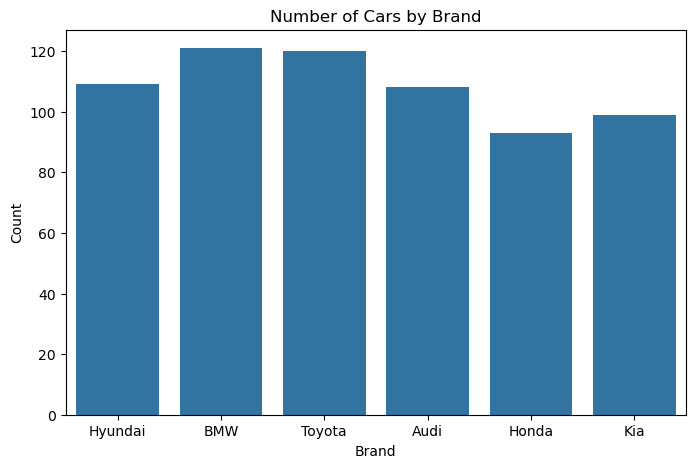

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(x="Brand", data=df)
plt.title("Number of Cars by Brand")
plt.xlabel("Brand")
plt.ylabel("Count")
plt.show()


Brands like Toyota, Hyundai, and Kia appear more frequently, showing they are more common in the dataset.

# Mileage Distribution

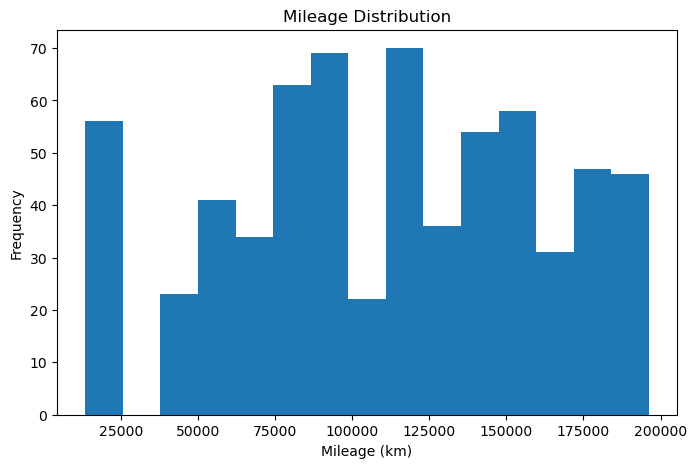

In [24]:
plt.figure(figsize=(8,5))
plt.hist(df["Mileage"], bins=15)
plt.title("Mileage Distribution")
plt.xlabel("Mileage (km)")
plt.ylabel("Frequency")
plt.show()

Most cars have mileage between 50,000 and 150,000 km. Fewer cars have very low or very high mileage.

# Mileage vs Price

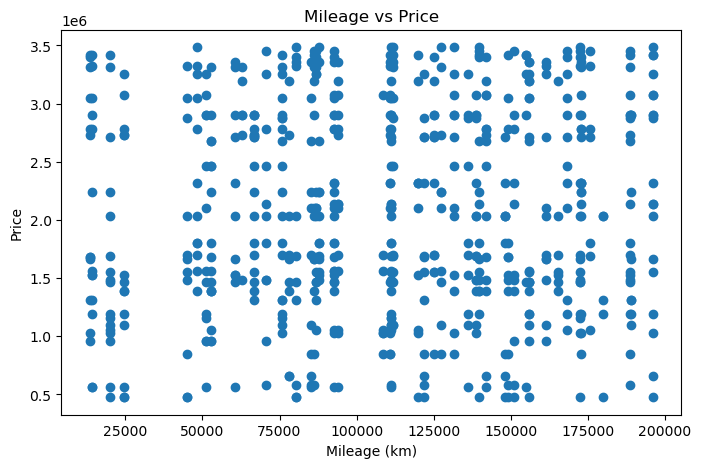

In [25]:
plt.figure(figsize=(8,5))
plt.scatter(df["Mileage"], df["Price"])
plt.title("Mileage vs Price")
plt.xlabel("Mileage (km)")
plt.ylabel("Price")
plt.show()

Cars with higher mileage tend to have lower prices.

# Price by Brand

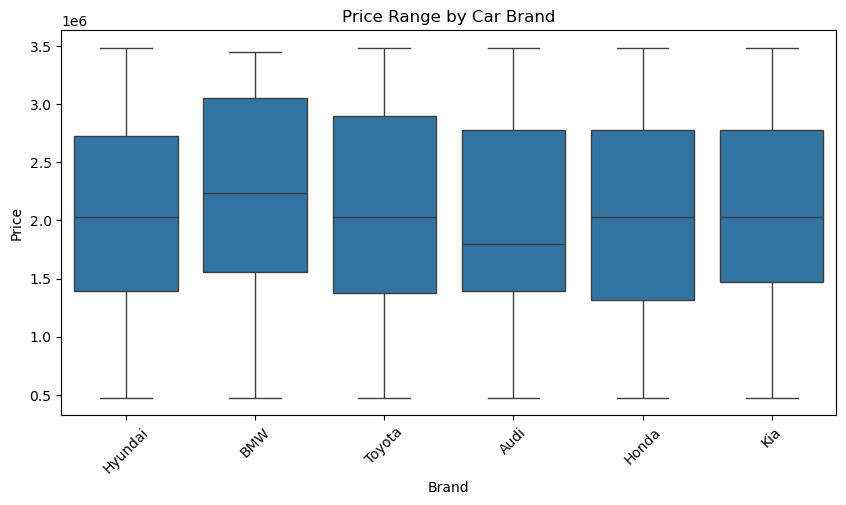

In [26]:
plt.figure(figsize=(10,5))
sns.boxplot(x="Brand", y="Price", data=df)
plt.title("Price Range by Car Brand")
plt.xticks(rotation=45)
plt.show()

Luxury brands like BMW and Audi show much higher price ranges, while brands like Hyundai and Kia have lower, more consistent prices.

# Correlation Heatmap

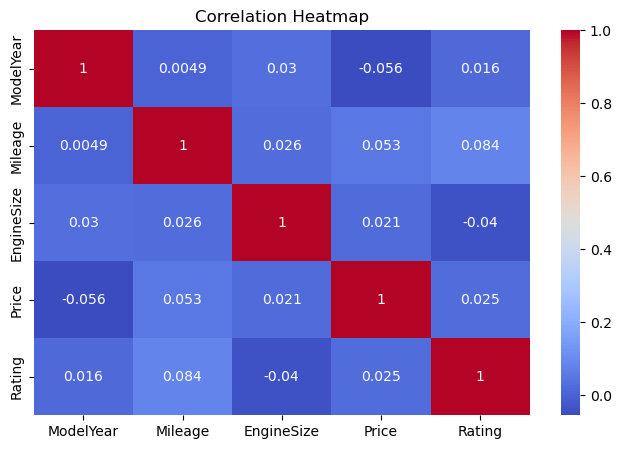

In [27]:
df_numeric = df.select_dtypes(include=["int64","float64"])
plt.figure(figsize=(8,5))
sns.heatmap(df_numeric.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

Price has a strong negative correlation with Mileage and ModelYear.

# CONCLUTION

The car sales dataset shows clear pricing patterns based on key vehicle features. Mileage has a strong negative effect on price—cars with more kilometers tend to be cheaper.